In [1]:
import sys, os
pth = os.path.abspath("../lib")
sys.path.insert(0, pth)

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import analyses.util as util
import plots.util as putil
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

/home/jhamrick/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1256: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
%%bash
scons

scons: Reading SConscript files ...
scons: done reading SConscript files.
scons: Building targets ...
scons: `.' is up to date.
scons: done building targets.


In [4]:
data = util.load_all()

# Inferring mass in complex physical scenes

Jessica B. Hamrick, Peter W. Battaglia, Thomas L. Griffiths, Joshua B. Tenenbaum

---

## IPE

We ran 100 IPE samples for each stimulus for 27 different values of $\kappa=\log_{10}(r)$:

In [5]:
kappas = np.asarray(data['ipe']['B'].data['kappa'].drop_duplicates())
print "Unique kappa values:", kappas

Unique kappa values: [-1.  0.  1.]


From these IPE samples, we can compute estimates of $p(\mathrm{fall}\ \vert\ \kappa, S)$ for each stimulus $S$. In order to enforce that this curve is continuous in the domain of $\kappa$, we apply a kernel smoothing procedure. For example, the following plot shows the raw estimates of $p(\mathrm{fall}\ \vert\ \kappa, S)$ for one particular $S$ (blue dots), as well as the final smoothed estimate (black line).

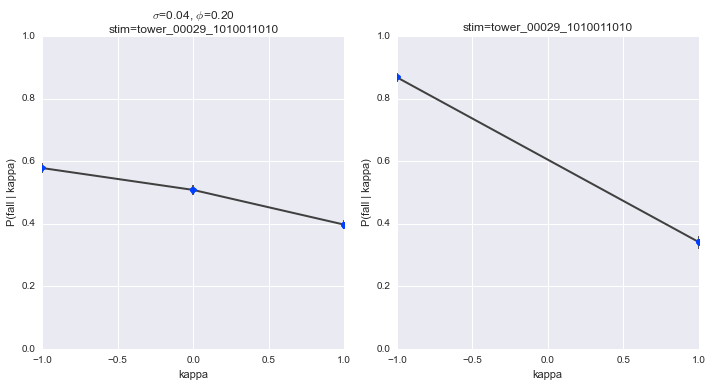

In [6]:
i = 'tower_00029_1010011010'
fig, (ax1, ax2) = plt.subplots(1, 2)
data['ipe']['C'].plot_fall(ax1, i, color=putil.colors[0])
data['empirical']['C'].plot_fall(ax2, i, color=putil.colors[0])
fig.set_figwidth(10)
plt.tight_layout()

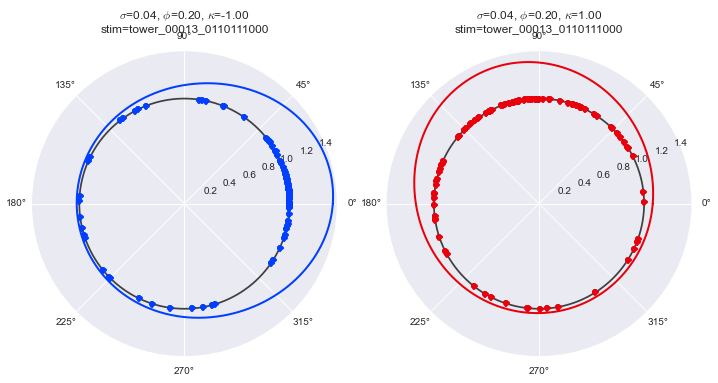

In [7]:
i = 0
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(polar=True))
data['ipe']['C'].plot_direction(ax1, i, -1.0, color=putil.colors[0])
data['ipe']['C'].plot_direction(ax2, i, 1.0, color=putil.colors[2])
ymax = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, ymax)
ax2.set_ylim(0, ymax)
fig.set_figwidth(10)
plt.tight_layout()

---

## Methods

We ran two experiments in which participants made judgments about the stability and mass of towers of building blocks. Both experiments were organized as follows:

* Pretest: "will it fall?" judgments on 6 original (non-mass) towers
* Block A: "will it fall?" judgments on 10 red/blue mass towers, with visual feedback
* Block B: "will it fall?" judgments on 20 red/blue mass towers, with no feedback
* Block C: "which is heavier?" judgments on the same towers as in Block B, with visual feedback
* Posttest: same as pretest, but different order

The difference between Experiment 1 and Experiment 2 was in block C. In Experiment 1, the colors of the blocks were different on every trial. In Experiment 2, the colors were always green and purple. Thus, in Experiment 1, participants had to make inferences based off of information from just a single trial, whereas in Experiment 2, participants had to integrate information about the mass over multiple trials.

The mass ratio was always the same for blocks A and B, but could be different for Block C, giving four conditions:

* Condition 0: A, B: $r=0.1$, C: $r=0.1$
* Condition 1: A, B: $r=0.1$, C: $r=10$
* Condition 2: A, B: $r=10$, C: $r=0.1$
* Condition 3: A, B: $r=10$, C: $r=10$

Additionally, we counterbalanced the colors, resulting in a total of eight conditions. People were distributed into the conditions as follows:

In [8]:
cond_counts = pd.read_csv("results/condition_counts.csv")\
    .set_index(['version', 'condition', 'counterbalance'])\
    .unstack('version')
cond_counts

num_participants        
version                                  G   H   I
condition counterbalance                          
0         0                             11  10  20
          1                              9  11  21
1         0                             10   9  21
          1                             10  10  20
2         0                             11  10  20
          1                             11  11  19
3         0                             12  10  20
          1                             11  10  20
4         0                            NaN NaN  20
          1                            NaN NaN  20
5         0                            NaN NaN  21
          1                            NaN NaN  20
6         0                            NaN NaN  20
          1                            NaN NaN  20
7         0                            NaN NaN  20
          1                            NaN NaN  20
8         0                            NaN NaN  20
          1                            NaN NaN  20
9         0                            NaN NaN  20
          1                            NaN NaN  19

In [9]:
pd.read_csv("results/num_participants.csv", index_col="version").T

version,G,H,I
duplicate_trials,7,0,0
failed_posttest,15,19,79
incomplete,18,21,75
ok,85,81,401
repeat_worker,4,1,7
complete,111,101,487
excluded,26,20,86


Participants were paid either \$1.25 (Experiment 1), \$1.00 (Experiment 2), or \$0.70 (Experiment 3):

In [10]:
pd.read_csv("results/payrate.csv").set_index('version')

,mean_pay,mean_time,median_time
version,,,
G,3.558558,0:19:29.353635,0:16:10.607000
H,4.886384,0:16:15.806728,0:14:38.268000
I,4.850309,0:09:20.487813,0:08:19.828000


---

## Results

### Can people reason with mass?

Previous research \cite{Battaglia2013} indicated that people can take information about the mass of objects into account when reasoning about physical properties like stability. The first parts of our experiment (Block A and Block B) were essentially the same design as that from \citeA{Battalia2013}, so we should see the same trends as in Battaliga2013.

First, we can take a look at how well the IPE estimates of $p(\mathrm{fall}\ \vert\ \kappa_0, S)$ predict human judgments of stability. In the following plots, the $x$-axis is the IPE's estimate of $p(\mathrm{fall}\ \vert\ \kappa, S)$ for $\kappa=\kappa_0$ (center subplots) and $\kappa=0.0$ (right subplots). The $y$-axis is people's judgments of stability on a scale from 1-7, with 1 being less stable, and 7 being more stable. The black lines connect stimuli with the same geometry.

These plots illustrate the same trend that was previously found: people are sensitive to the information about mass. In the left plots, we see that people give different judgments for stimuli with identical when they are told that the mass ratio is different. The IPE does the same when it is given information about mass (center plots). As such, IPE predictions that were generated without knowledge of mass are poor predictions of human judgments (right plots).

---

#### "Will it fall?" responses from block A

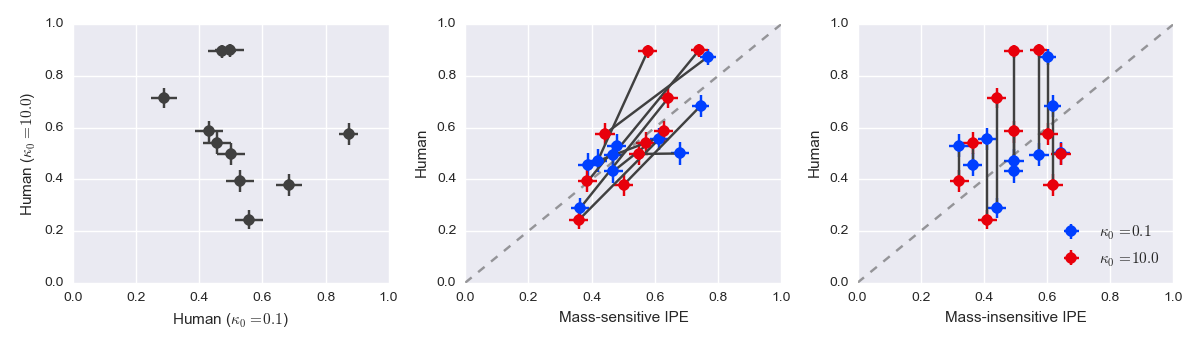

In [11]:
# plot "will it fall?" responses for block A
Image("figures/fall_responses_GH_A.png")

These are the corresponding Pearson correlations for the above plots (`ModelIS` is the mass-insensitive IPE, and `ModelS` is the mass-sensitive IPE).

In [12]:
pd.read_csv("results/fall_response_corrs.csv").set_index(['block', 'X', 'Y']).ix['A']

,,lower,median,upper
X,Y,,,
Human,Human,-0.790480,-0.355564,0.033722
ModelIS,Human,-0.034124,0.309514,0.585741
ModelS,Human,0.572999,0.798708,0.923648


---

#### "Will it fall?" responses from block B

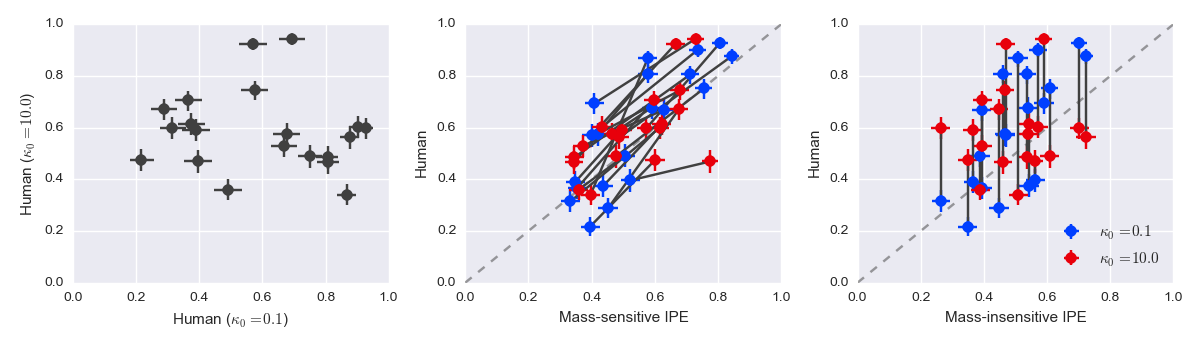

In [13]:
# plot "will it fall?" responses for block B
Image("figures/fall_responses_GH_B.png")

These are the corresponding Pearson correlations for the above plots (`ModelIS` is the mass-insensitive IPE, and `ModelS` is the mass-sensitive IPE).

In [14]:
pd.read_csv("results/fall_response_corrs.csv").set_index(['block', 'X', 'Y']).ix['B']

,,lower,median,upper
X,Y,,,
Human,Human,-0.482480,-0.130153,0.190906
ModelIS,Human,0.183117,0.433896,0.638484
ModelS,Human,0.568505,0.756026,0.866582


---

### Can people infer mass?

Before we can make an argument that people infer mass in a manner consistent with the "noisy Newton" approach, we must first demonstrate that people can make inferences about mass at all. Recent research (Sanborn2013) has explained how previous results suggesting people do not make sophisticated inferences about mass (Todd1982, Gilden1994) can be explained using Bayesian inference. However, no one has yet shown whether this also holds true in more complicated, realistic scenes.

We can examine the accuracy of "which is heavier?" judgments from block C of the experiment to see whether people are judging the heavier color actually as heavier. If they are guessing randomly, then we should see around 50% accuracy. If they are correctly inferring the mass, then their accuracy should be above 50%.

---

#### Overall accuracy

As shown by the following table, people are (across stimuli) above chance at determining the heavier color, regardless of the mass ratio:

In [15]:
pd.read_csv("results/mass_accuracy.csv")\
    .groupby(['species', 'version'])\
    .get_group(('human', 'H'))\
    .set_index('kappa0')\
    .drop(['species', 'class', 'version'], axis=1)

,lower,median,upper
kappa0,,,
-1.0,0.785681,0.812971,0.838357
1.0,0.796480,0.824220,0.849837
all,0.799191,0.818453,0.836709


---

#### Per-stimulus accuracy

We see that people are also above chance on many of the individual stimuli, though there are a few stimuli for which people are at chance:

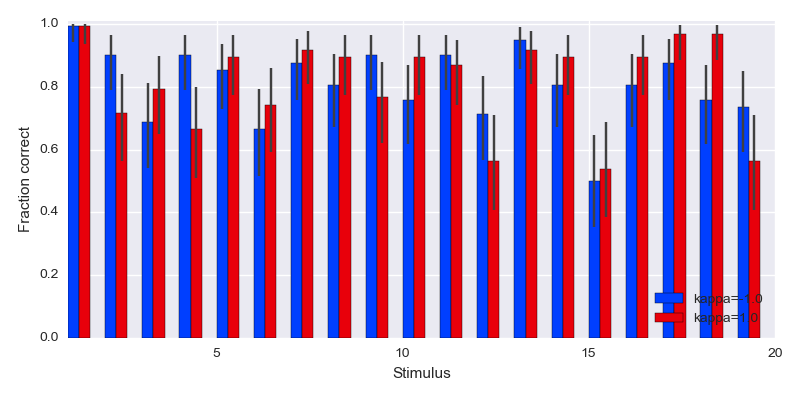

In [16]:
Image("figures/mass_accuracy_by_stimulus.png")

Specifically, significantly above chance on 31 of these stimuli, and not significantly above chance for 9 of these stimuli (using Bonferroni correction for multiple comparisons):

In [17]:
pd.read_csv("results/num_chance.csv").groupby('version')['0.00125'].sum()

version
G          18
H           9
I           2
Name: 0.00125, dtype: float64

---

### How do people infer mass?

#### Human vs. model accuracy

Are the stimuli that people are better at inferring mass from the same stimuli that the model is good at inferring mass from? We see that the original IPE is not very correlated with people, but the IPE based off of people's "fall?" judgments is:

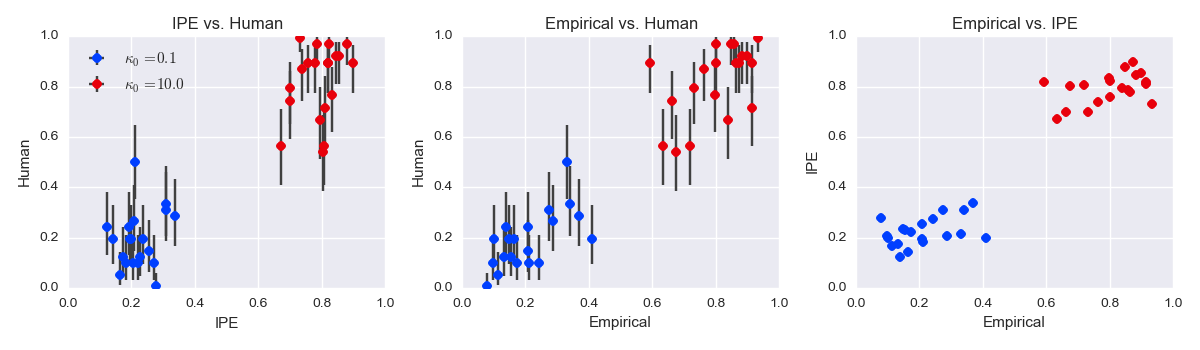

In [18]:
Image("figures/mass_responses_by_stimulus.png")

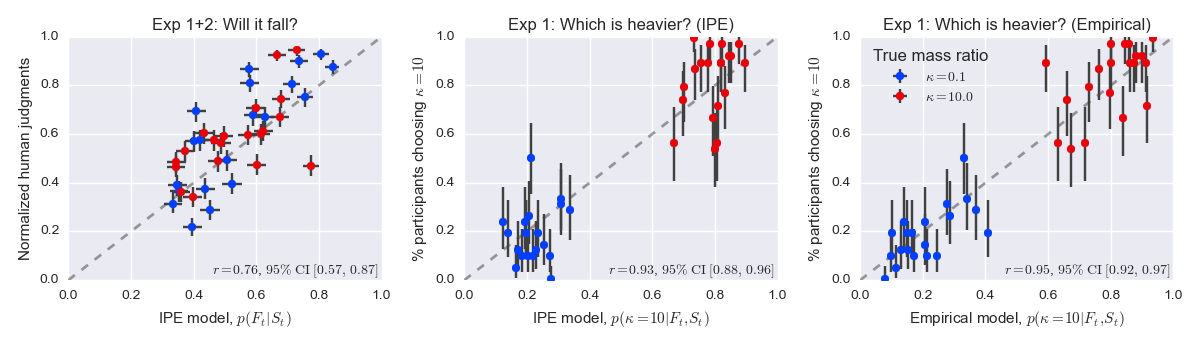

In [19]:
Image("figures/model_results.png")

In [20]:
pd.read_csv("results/mass_responses_by_stimulus_corrs.csv").groupby('version').get_group('H').set_index(['X', 'Y'])

,,version,lower,median,upper
X,Y,,,,
Empirical,Human,H,0.918029,0.951259,0.974142
IPE,Human,H,0.883597,0.930125,0.964369


In [21]:
pd.read_csv("results/mass_accuracy_by_stimulus_corrs.csv").groupby('version').get_group('H').set_index(['X', 'Y'])

,,version,lower,median,upper
X,Y,,,,
Empirical,Human,H,0.352367,0.599572,0.785123
IPE,Human,H,-0.026825,0.265190,0.533966


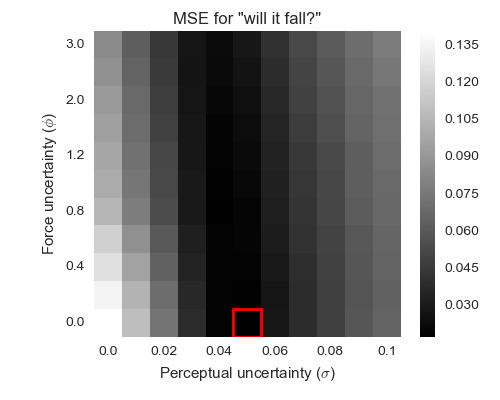

In [22]:
Image("figures/fall_responses_best_parameters.png")

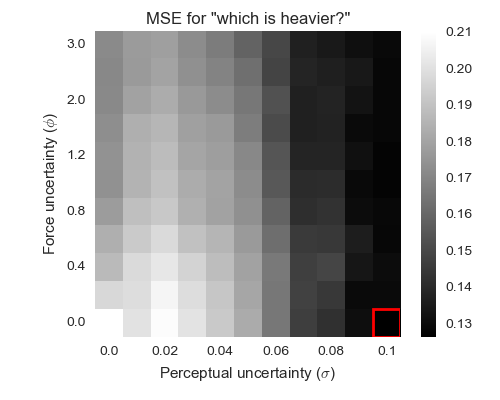

In [23]:
Image("figures/mass_accuracy_best_parameters.png")

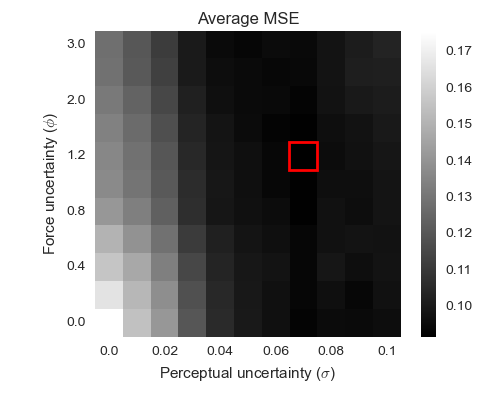

In [24]:
Image("figures/best_parameters.png")

---

### Do people integrate information over time?

The following plot does not show a clear effect of learning over time -- just that people are above chance.

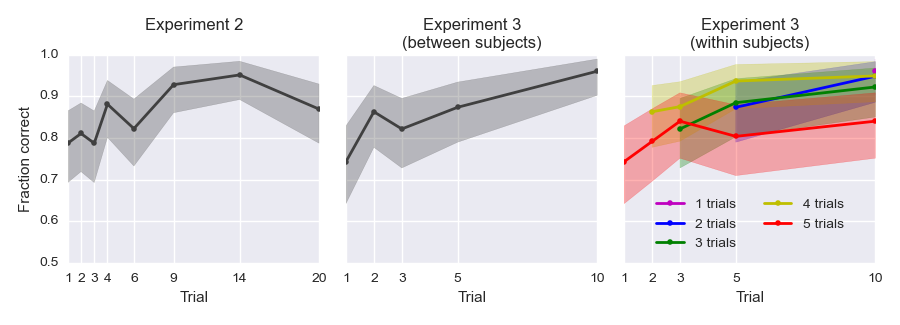

In [25]:
Image("figures/mass_accuracy_by_trial.png")

In [26]:
pd.read_csv("results/mass_accuracy_by_trial_corrs.csv")\
    .groupby('kappa0')\
    .get_group('all')\
    .drop('kappa0', axis=1)\
    .set_index(['version', 'num_mass_trials'])\
    .sortlevel()

lower    median     upper
version num_mass_trials                              
G        8               0.238095  0.682647  0.904762
H        20             -0.204702  0.072577  0.352423
I       -1               0.461690  0.820783  1.000000
         1                    NaN       NaN       NaN
         2              -1.000000  1.000000       NaN
         3               0.000000  1.000000  1.000000
         4               0.105409  0.800000  1.000000
         5              -0.300000  0.600000  0.974679

If we look more closely at individual participants, we see that the majority of them did eventually figure out which color was heavier. The following plots shows the fraction of participants who gave the correct answer on trial $t$ and all trials afterwards. In both conditions, the majority of participatns eventually figured out the which color was heavier, however there were also some participants who never settled on the correct answer. It is possible that these participants were confused about the instructions, and did not realize that the heavier color was always the same.

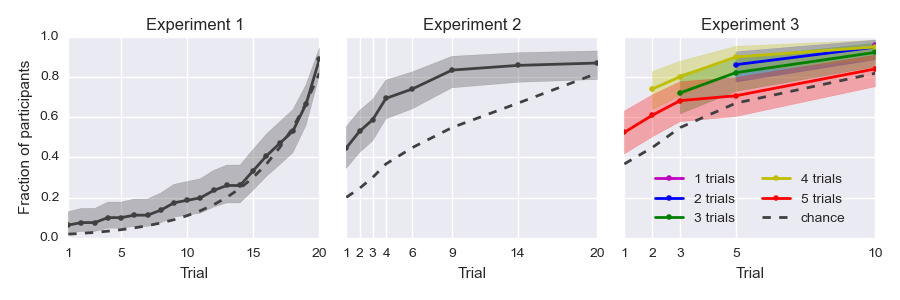

In [27]:
Image("figures/num_learned_by_trial.png")

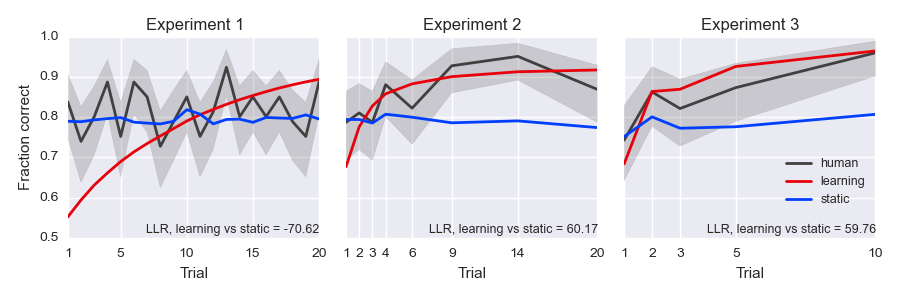

In [28]:
Image("figures/mass_accuracy_by_trial_with_empirical.png")

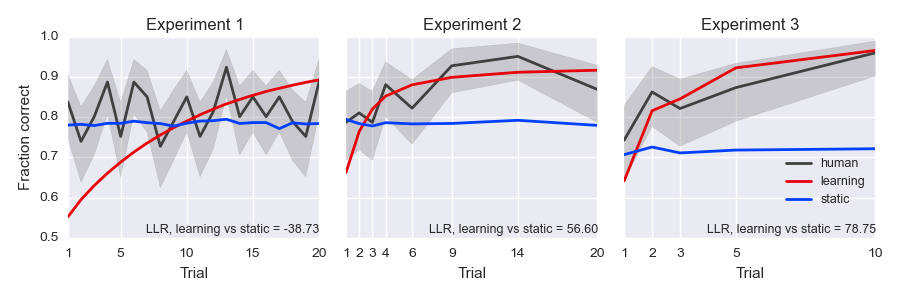

In [29]:
Image("figures/mass_accuracy_by_trial_with_ipe.png")

To look at the data from a slightly different angle, we can compare three different inference models:

* `chance` -- guesses uniformly at random, reflecting the hypothesis that people do not make any inferences about mass
* `learning` -- updates its beliefs according to Bayes' rule, using physical knowledge from the IPE
* `static` -- uses physical knowledge from the IPE, but only considers information from the most recent trial (does not update beliefs)

Both models which utilize knowledge from the IPE are better explanations of people's behavior than a model that guesses randomly:

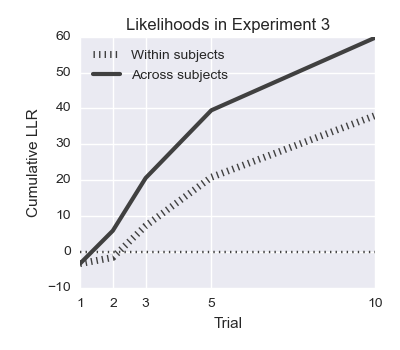

In [30]:
Image("figures/model_log_lh_ratio_by_trial.png")

In [31]:
pd.read_csv("results/model_log_lh_ratios.csv")

,version,likelihood,num_trials,llhr
0,G,empirical,8,60.165654
1,G,ipe,8,56.603726
2,H,empirical,20,-70.622147
3,H,ipe,20,-38.725476
4,I,empirical,1,20.282147
5,I,empirical,2,34.508023
6,I,empirical,3,47.933274
7,I,empirical,4,57.459301
8,I,empirical,5,38.040544
9,I,ipe,1,28.380658


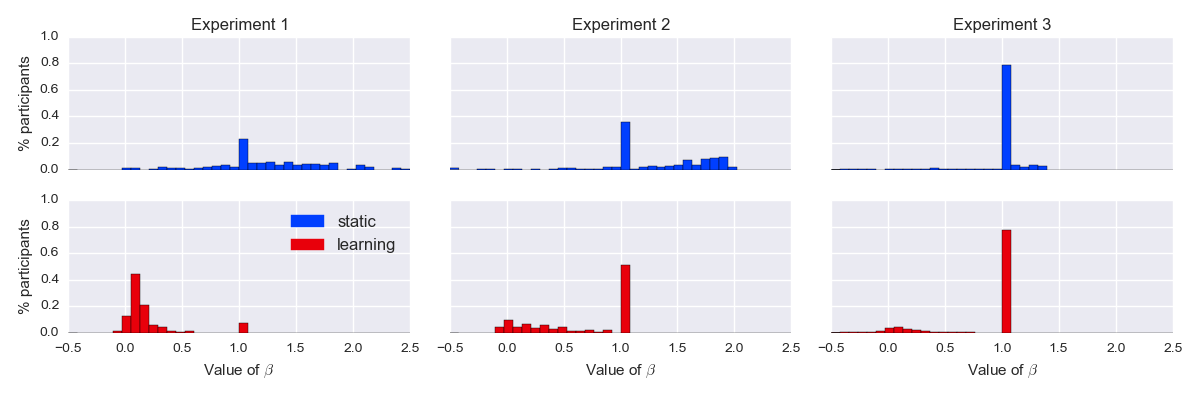

In [32]:
Image("figures/model_params.png")